#  Q2. Work with the real estate dataset, realestate.xlsx or realestate.csv

In [1]:
import pandas as pd
import itertools
import seaborn as sns
import statsmodels.api as sm

### A. (4 pts) You are asked to predict Sale Price, what are your reasonable choices from the dataset? Please
### report the total amounts of reasonable choices in the report, write a python code to express all your
### reasonable choices in regression formula.

Note: reasonable choices refer to considering all possible combinations of independent variables.

I'll answer this question with two possible algorithms

In [2]:
#Recursive function to find all possible combinations of independent variables
def combs(a):
    if len(a) == 0:
        return [[]]
    cs = []
    for c in combs(a[1:]):
        cs += [c, c+[a[0]]]
    return cs

print(combs(['A', 'B', 'C', 'D']))
print('The number of total combination possible is:',len(combs(['A', 'B', 'C', 'D'])))

[[], ['A'], ['B'], ['B', 'A'], ['C'], ['C', 'A'], ['C', 'B'], ['C', 'B', 'A'], ['D'], ['D', 'A'], ['D', 'B'], ['D', 'B', 'A'], ['D', 'C'], ['D', 'C', 'A'], ['D', 'C', 'B'], ['D', 'C', 'B', 'A']]
The number of total combination possible is: 16


In [3]:
#Iterative function to find all possible combinations of independent variables
list_A = ['A', 'B', 'C', 'D']
list_combinations = []
number_combinations = 0
for i in range(len(list_A)+1):
    list_combinations.append(list(itertools.combinations(list_A, i)))

for i in range(len(list_combinations)):
    number_combinations += len(list_combinations[i])

print(list_combinations)
print('The number of total combinations possible is:',number_combinations)

[[()], [('A',), ('B',), ('C',), ('D',)], [('A', 'B'), ('A', 'C'), ('A', 'D'), ('B', 'C'), ('B', 'D'), ('C', 'D')], [('A', 'B', 'C'), ('A', 'B', 'D'), ('A', 'C', 'D'), ('B', 'C', 'D')], [('A', 'B', 'C', 'D')]]
The number of total combinations possible is: 16


In [4]:
#I'll use the recursive method to find all possible combinations of independent variables
list_independent_variables = ['Size', 'Beds', 'Baths', 'Num_Garage','Year','Highway','Aircondition','Swimmingpool']

print(combs(list_independent_variables))

[[], ['Size'], ['Beds'], ['Beds', 'Size'], ['Baths'], ['Baths', 'Size'], ['Baths', 'Beds'], ['Baths', 'Beds', 'Size'], ['Num_Garage'], ['Num_Garage', 'Size'], ['Num_Garage', 'Beds'], ['Num_Garage', 'Beds', 'Size'], ['Num_Garage', 'Baths'], ['Num_Garage', 'Baths', 'Size'], ['Num_Garage', 'Baths', 'Beds'], ['Num_Garage', 'Baths', 'Beds', 'Size'], ['Year'], ['Year', 'Size'], ['Year', 'Beds'], ['Year', 'Beds', 'Size'], ['Year', 'Baths'], ['Year', 'Baths', 'Size'], ['Year', 'Baths', 'Beds'], ['Year', 'Baths', 'Beds', 'Size'], ['Year', 'Num_Garage'], ['Year', 'Num_Garage', 'Size'], ['Year', 'Num_Garage', 'Beds'], ['Year', 'Num_Garage', 'Beds', 'Size'], ['Year', 'Num_Garage', 'Baths'], ['Year', 'Num_Garage', 'Baths', 'Size'], ['Year', 'Num_Garage', 'Baths', 'Beds'], ['Year', 'Num_Garage', 'Baths', 'Beds', 'Size'], ['Highway'], ['Highway', 'Size'], ['Highway', 'Beds'], ['Highway', 'Beds', 'Size'], ['Highway', 'Baths'], ['Highway', 'Baths', 'Size'], ['Highway', 'Baths', 'Beds'], ['Highway', 'Ba

In [5]:
print('The number of total combinations possible is:',len(combs(list_independent_variables))-1)
# we subtract 1 to the number because the first element is null.

The number of total combinations possible is: 255


---

### B. (4 pts) To avoid overfitting, we would set some constraints when training the model. Please write a
### python code to find the best linear regression with the following two constraints and export the
### regression summary to Q2_b.txt:
1. Highway should be one of the independent variables.
2. The total number of independent variables of the model should not exceed 4

In [6]:
#Load the dataset
df_realstate = pd.read_csv('dataset/Realstate.csv')
df_realstate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SalePrice     521 non-null    float64
 1   Size          521 non-null    float64
 2   Beds          521 non-null    int64  
 3   Baths         521 non-null    int64  
 4   Num_Garage    521 non-null    int64  
 5   Year          521 non-null    int64  
 6   Highway       521 non-null    object 
 7   Aircondition  521 non-null    object 
 8   SwimmingPool  521 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 36.8+ KB


It is important in the case of Linear regression to look at the correlation between the independent variables and the dependent variable, and to make sure that the independent variables are not correlated with each other.
To achieve this, we can use the following code to plot the correlation between the independent variables and the dependent variable.

<AxesSubplot:>

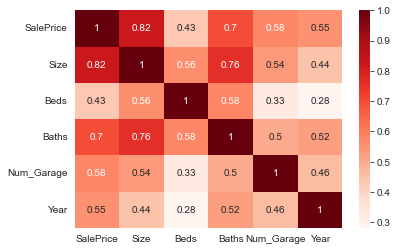

In [7]:
# correlation matrix with sns.heatmap
corr_matrix = df_realstate.corr()
sns.heatmap(corr_matrix, annot=True, cmap='Reds')

In this case I'll use the iterative function to find out the possible solution among combinations.

I'll drop Year because it is more complex to use it in this case, and we have enough other independent variables.
We could have used the following code block to transform the year into an independent variable usable in the regression model.

~~~
import datetime
data_df['conv_date'] = pd.to_datetime(data_df.date, format="%Y-%M-%D")
data_df['conv_date'] = data_df['conv_date'].map(datetime.datetime.toordinal)
~~~

We create the combination list including Highway and the rest of independent variables.
Highway is the independent variable we want to use in every combination.
Our maximum number of independent variables is 4.

In [8]:
list_independent_variables = ['Size', 'Beds', 'Baths', 'Num_Garage','Aircondition','SwimmingPool']
list_combinations_highway = []
number_combinations = 0

for i in range(4):
    list_combinations_highway.append(list(itertools.combinations(list_independent_variables,i)))

for i in range(len(list_combinations_highway)):
    for j in range(len(list_combinations_highway[i])):
        list_combinations_highway[i][j] = list(list_combinations_highway[i][j])

for i in range(len(list_combinations_highway)):
    for j in range(len(list_combinations_highway[i])):
        list_combinations_highway[i][j].append('Highway')

#Drop the first item of the list because we don't need Highway alone
list_combinations_highway = list_combinations_highway[1:]

for i in range(len(list_combinations_highway)):
    number_combinations += len(list_combinations_highway[i])

In [9]:
#This list will be the combinations used
print(list_combinations_highway)

[[['Size', 'Highway'], ['Beds', 'Highway'], ['Baths', 'Highway'], ['Num_Garage', 'Highway'], ['Aircondition', 'Highway'], ['SwimmingPool', 'Highway']], [['Size', 'Beds', 'Highway'], ['Size', 'Baths', 'Highway'], ['Size', 'Num_Garage', 'Highway'], ['Size', 'Aircondition', 'Highway'], ['Size', 'SwimmingPool', 'Highway'], ['Beds', 'Baths', 'Highway'], ['Beds', 'Num_Garage', 'Highway'], ['Beds', 'Aircondition', 'Highway'], ['Beds', 'SwimmingPool', 'Highway'], ['Baths', 'Num_Garage', 'Highway'], ['Baths', 'Aircondition', 'Highway'], ['Baths', 'SwimmingPool', 'Highway'], ['Num_Garage', 'Aircondition', 'Highway'], ['Num_Garage', 'SwimmingPool', 'Highway'], ['Aircondition', 'SwimmingPool', 'Highway']], [['Size', 'Beds', 'Baths', 'Highway'], ['Size', 'Beds', 'Num_Garage', 'Highway'], ['Size', 'Beds', 'Aircondition', 'Highway'], ['Size', 'Beds', 'SwimmingPool', 'Highway'], ['Size', 'Baths', 'Num_Garage', 'Highway'], ['Size', 'Baths', 'Aircondition', 'Highway'], ['Size', 'Baths', 'SwimmingPool', 

In [10]:
print('The number of total combinations possible is:',number_combinations)

The number of total combinations possible is: 41


By looking at the head of the dataset we see that the column 'Highway', 'Aircondition' and 'SwimmingPool' are not usable in this current form.

In [11]:
#Transform the yes and no into 1 and 0
df_realstate.Highway.replace(('yes', 'no'), (1, 0), inplace=True)
df_realstate.Aircondition.replace(('yes', 'no'), (1, 0), inplace=True)
df_realstate.SwimmingPool.replace(('yes', 'no'), (1, 0), inplace=True)

df_realstate

,SalePrice,Size,Beds,Baths,Num_Garage,Year,Highway,Aircondition,SwimmingPool
0,360.0,3.032,4,4,2,1972,0,1,0
1,340.0,2.058,4,2,2,1976,0,1,0
2,250.0,1.780,4,3,2,1980,0,1,0
3,205.5,1.638,4,2,2,1963,0,1,0
4,275.5,2.196,4,3,2,1968,0,1,0
...,...,...,...,...,...,...,...,...,...
516,137.0,1.655,2,1,1,1935,0,0,0
517,185.0,1.944,3,2,2,1939,0,1,0
518,133.5,1.922,3,1,2,1950,0,0,0
519,124.0,1.480,3,2,2,1953,0,1,0


One of the requirement is that 'Highway' should always be in the independent variables.
By a quick OLS we can understand the importance of 'Highway' on the dependent variable alone.

In [12]:
#OLS Regression with 1 independent variables
features = ['Highway']
X = df_realstate[features]
y = df_realstate.SalePrice
sm.OLS(y, X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):              0.010
Method:                 Least Squares   F-statistic:                              6.132
Date:                Mon, 25 Apr 2022   Prob (F-statistic):                      0.0136
Time:                        11:49:02   Log-Likelihood:                         -3724.3
No. Observations:                 521   AIC:                                      7451.
Df Residuals:                     520   BIC:                                      7455.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Highway      230.0273     92.895      2.476      0.014      47.531     412.523
==============================================================================
Omnibus:                      125.306   Durbin-Watson:                   0.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              257.701
Skew:                           1.305   Prob(JB):                     1.10e-56
Kurtosis:                       5.249   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We will compare combination of the same number among themselves,
 afterward we will compare the best combinations.

In [13]:
#Identifying the best independent variables through the list of 2 combinations of independent variables
list_2_variables = list_combinations_highway[0]
R_squared_list_2v = []

for i in range(len(list_2_variables)):
    df_2_variables = df_realstate[list_2_variables[i]]
    X = df_2_variables
    y = df_realstate.SalePrice
    R_squared_list_2v.append(sm.OLS(y, X).fit().rsquared)

R_squared_list_2v

[0.9300156539805287,
 0.8355756206586161,
 0.8971186971749613,
 0.8681617522331029,
 0.7558945613780081,
 0.10102805689637384]

In [14]:
#Looking for the best rsquared value of the list
max_value = max(R_squared_list_2v)
max_index = R_squared_list_2v. index(max_value)
print('For 2 variables the max R-squared is', max_value, 'with the combination', list_2_variables[max_index])

For 2 variables the max R-squared is 0.9300156539805287 with the combination ['Size', 'Highway']


In [15]:
#Identifying the best independent variables through the list of 3 combinations of independent variables
list_3_variables = list_combinations_highway[1]
R_squared_list_3v = []

for i in range(len(list_3_variables)):
    df_3_variables = df_realstate[list_3_variables[i]]
    X = df_3_variables
    y = df_realstate.SalePrice
    R_squared_list_3v.append(sm.OLS(y, X).fit().rsquared)

R_squared_list_3v

[0.9331087875583655,
 0.9322558566329116,
 0.9306806837518629,
 0.9300218294863676,
 0.9301617097511793,
 0.8988518415475699,
 0.8789527716489902,
 0.8459562733726487,
 0.8369002313778217,
 0.9110415599261054,
 0.8991797188102146,
 0.8971498742085265,
 0.8709782228844751,
 0.8694939804325788,
 0.7592381177342928]

In [16]:
#Looking for the best rsquared value of the list
max_value = max(R_squared_list_3v)
max_index = R_squared_list_3v. index(max_value)
print('For 3 variables the max R-squared is', max_value, 'with the combination', list_3_variables[max_index])

For 3 variables the max R-squared is 0.9331087875583655 with the combination ['Size', 'Beds', 'Highway']


In [17]:
#Identifying the best independent variables through the list of 4 combinations of independent variables
list_4_variables = list_combinations_highway[2]
R_squared_list_4v = []


for i in range(len(list_4_variables)):
    df_4_variables = df_realstate[list_4_variables[i]]
    X = df_4_variables
    y = df_realstate.SalePrice
    R_squared_list_4v.append(sm.OLS(y, X).fit().rsquared)

R_squared_list_4v

[0.9371985113179532,
 0.9349282332863939,
 0.9333145004289432,
 0.9332665814492123,
 0.932578433400195,
 0.9324045705080437,
 0.932316786385806,
 0.9308394511659724,
 0.930831600562001,
 0.9301697422334212,
 0.911267670809546,
 0.8999004269903815,
 0.8988928099407894,
 0.8793715590760882,
 0.8798181607147949,
 0.8469519718735682,
 0.9110856198052191,
 0.9111171756564705,
 0.8992075844196166,
 0.8720995794167891]

In [18]:
#Looking for the best rsquared value of the list
max_value = max(R_squared_list_4v)
max_index = R_squared_list_4v. index(max_value)
print('For 3 variables the max R-squared is', max_value, 'with the combination', list_4_variables[max_index])

For 3 variables the max R-squared is 0.9371985113179532 with the combination ['Size', 'Beds', 'Baths', 'Highway']


The 4 variable model is the most precise with the combination of ['Size', 'Beds', 'Baths', 'Highway'] we get an R-squared of 0.937.
But the 2 variable model offer a precision of 1% less with a far more robust configuration and simple implementation.
This is why I decide to use the two independent variable model.

In [19]:
# OLS regression with 2 independent variables ['Size', 'Highway']
features = ['Size', 'Highway']
X = df_realstate[features]
y = df_realstate.SalePrice
results = sm.OLS(y, X).fit().summary()
sm.OLS(y, X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.930
Model:                            OLS   Adj. R-squared (uncentered):              0.930
Method:                 Least Squares   F-statistic:                              3448.
Date:                Mon, 25 Apr 2022   Prob (F-statistic):                   1.90e-300
Time:                        11:49:02   Log-Likelihood:                         -3034.6
No. Observations:                 521   AIC:                                      6073.
Df Residuals:                     519   BIC:                                      6082.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Size         126.1095      1.528     82.526      0.000     123.107     129.112
Highway      -18.0416     24.925     -0.724      0.469     -67.008      30.925
==============================================================================
Omnibus:                      210.769   Durbin-Watson:                   0.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              810.744
Skew:                           1.855   Prob(JB):                    8.89e-177
Kurtosis:                       7.856   Cond. No.                         16.4
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
#Export of the results
with open('Q2_b.txt', 'w') as fh:
    fh.write(results.as_text())